# Final Project
### HACKTIV8 Full Time Data Science
---


## Content

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Model Definition
6. Model Training
7. Prediction

##  1. Introduction 

<h4 style="font-size:6;margin:20px">Group name : Insight Lab</h4>
<h5 style="font-size:3;margin:20px">Member:</h4>
<h5 style="font-size:3;margin:20px">• Abdurrahman Shiddiq Thaha</h4>
<h5 style="font-size:3;margin:20px">• Alexander Prasetyo Christianto</h4>
<h5 style="font-size:3;margin:20px">• Ihsan Aulia Rahman</h4>
<h5 style="font-size:6;margin:20px">• Maheswara Sinatriyo</h4>
<h5 style="font-size:6;margin:20px">• Rizky Anshari</h4>

### •  Problem Statement

Segmentasi pelanggan memudahkan perusahaan untuk memperlakukan pelanggan mereka dengan melihat mereka secara menyeluruh dan mengklasifikasikan kesamaan. sedangkan prediksi penjualan menggambarkan penjualan dan minat pelanggan terhadap barang yang dijual untuk timeframe waktu kedepan.


## 2. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- statsmodels : Used to determine the stationarity of the time series data

- pmdarima : used to perform arima time series modeling

- warnings : Used to ignore any warning

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline

sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

## 3. Data Loading 

We have been provided with 5 datasets . The description for what the dataset contain is given below: 


1. **df_orders.csv** : This dataset contains information of each orders happens in since 2013 until 2018

In [120]:
# Loading data
df_orders = pd.read_csv('data/orders/dsv1069_orders.csv')

In [399]:
df_orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at,month,date
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-10,2016-10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-10,2016-10


In [400]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47402 entries, 0 to 47401
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   invoice_id     47402 non-null  float64       
 1   line_item_id   47402 non-null  float64       
 2   user_id        47402 non-null  float64       
 3   item_id        47402 non-null  float64       
 4   item_name      47402 non-null  object        
 5   item_category  47402 non-null  object        
 6   price          47402 non-null  float64       
 7   created_at     47402 non-null  datetime64[ns]
 8   paid_at        47402 non-null  object        
 9   month          47402 non-null  period[M]     
 10  date           47402 non-null  period[M]     
dtypes: datetime64[ns](1), float64(5), object(3), period[M](2)
memory usage: 4.0+ MB


This dataset has 47302 rows and 10 columns, with no null values

### • Changing data type

`created_at` : object -> datetime


In [401]:
df_orders['created_at'] =  pd.to_datetime(df_orders['created_at'])

In [402]:
df_orders['date'] = df_orders['created_at'].dt.to_period('M')


In [403]:
df_orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at,month,date
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,2017-06,2017-06
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-10,2016-10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10,2016-10,2016-10


### • Grouping dataset
we will group our dataset according to column `date` and `category`


In [134]:
df_ts = df_orders.groupby(['date', 'item_category']).agg(count=('invoice_id', 'count'), sum=('price', 'sum'))
df_ts

count     sum
date    item_category               
2013-03 contraption        2  387.50
        instrument         1   48.40
        mechanism          3   64.50
2013-04 instrument         6  459.80
        mechanism          5   69.60
...                      ...     ...
2018-06 instrument         2   48.40
        mechanism          7   75.75
        module             5  474.00
        tool               4   81.50
        widget             4    8.82

[627 rows x 2 columns]

#### Create a dictionary to be filled with time series dataframe of each category


In [372]:
dictio = {}
categories = df_orders['item_category'].unique()
for cat in categories:
    dictio[cat] = df_ts.loc[(slice(None), cat), :][-54:-1].reset_index(0).reset_index(drop=True)
    
    
    

## 4. EDA (Exploratory Data Analysis)

In [392]:
# define a function to plot the time series data
def plot(dictionary, feature, vert_line=None, length=16, width=5):
    fig, axes = plt.subplots(len(feature), 1, figsize=(length, width))
    for c, ax in zip(feature, axes):        
        
        # check the stationary of each time series data
        result = adfuller(dictio[c]['count'].values)        
        if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
            result_stationary = 'stationary'
        else:
            result_stationary = 'non-stationary'
        
        
        # plotting the quantity and sales of each time series data
        _ = sns.lineplot(x=dictionary[c]['date'].astype(str), y=dictionary[c]['count'], color='blue', ax=ax)
        g = sns.lineplot(x=dictionary[c]['date'].astype(str), y=dictionary[c]['sum'], color='green', ax=_.axes.twinx())
        ax.tick_params(axis='x', rotation=60)
        ax.set_title(f'{c} - {result_stationary}')
        if vert_line:
            plt.axvline(vert_line, color='red')
        else:
            pass
        _.legend(handles=[Line2D([], [], marker='_', color="b", label='count'), Line2D([], [], marker='_', color="g", label='sales')])
        
        
        
    plt.tight_layout()

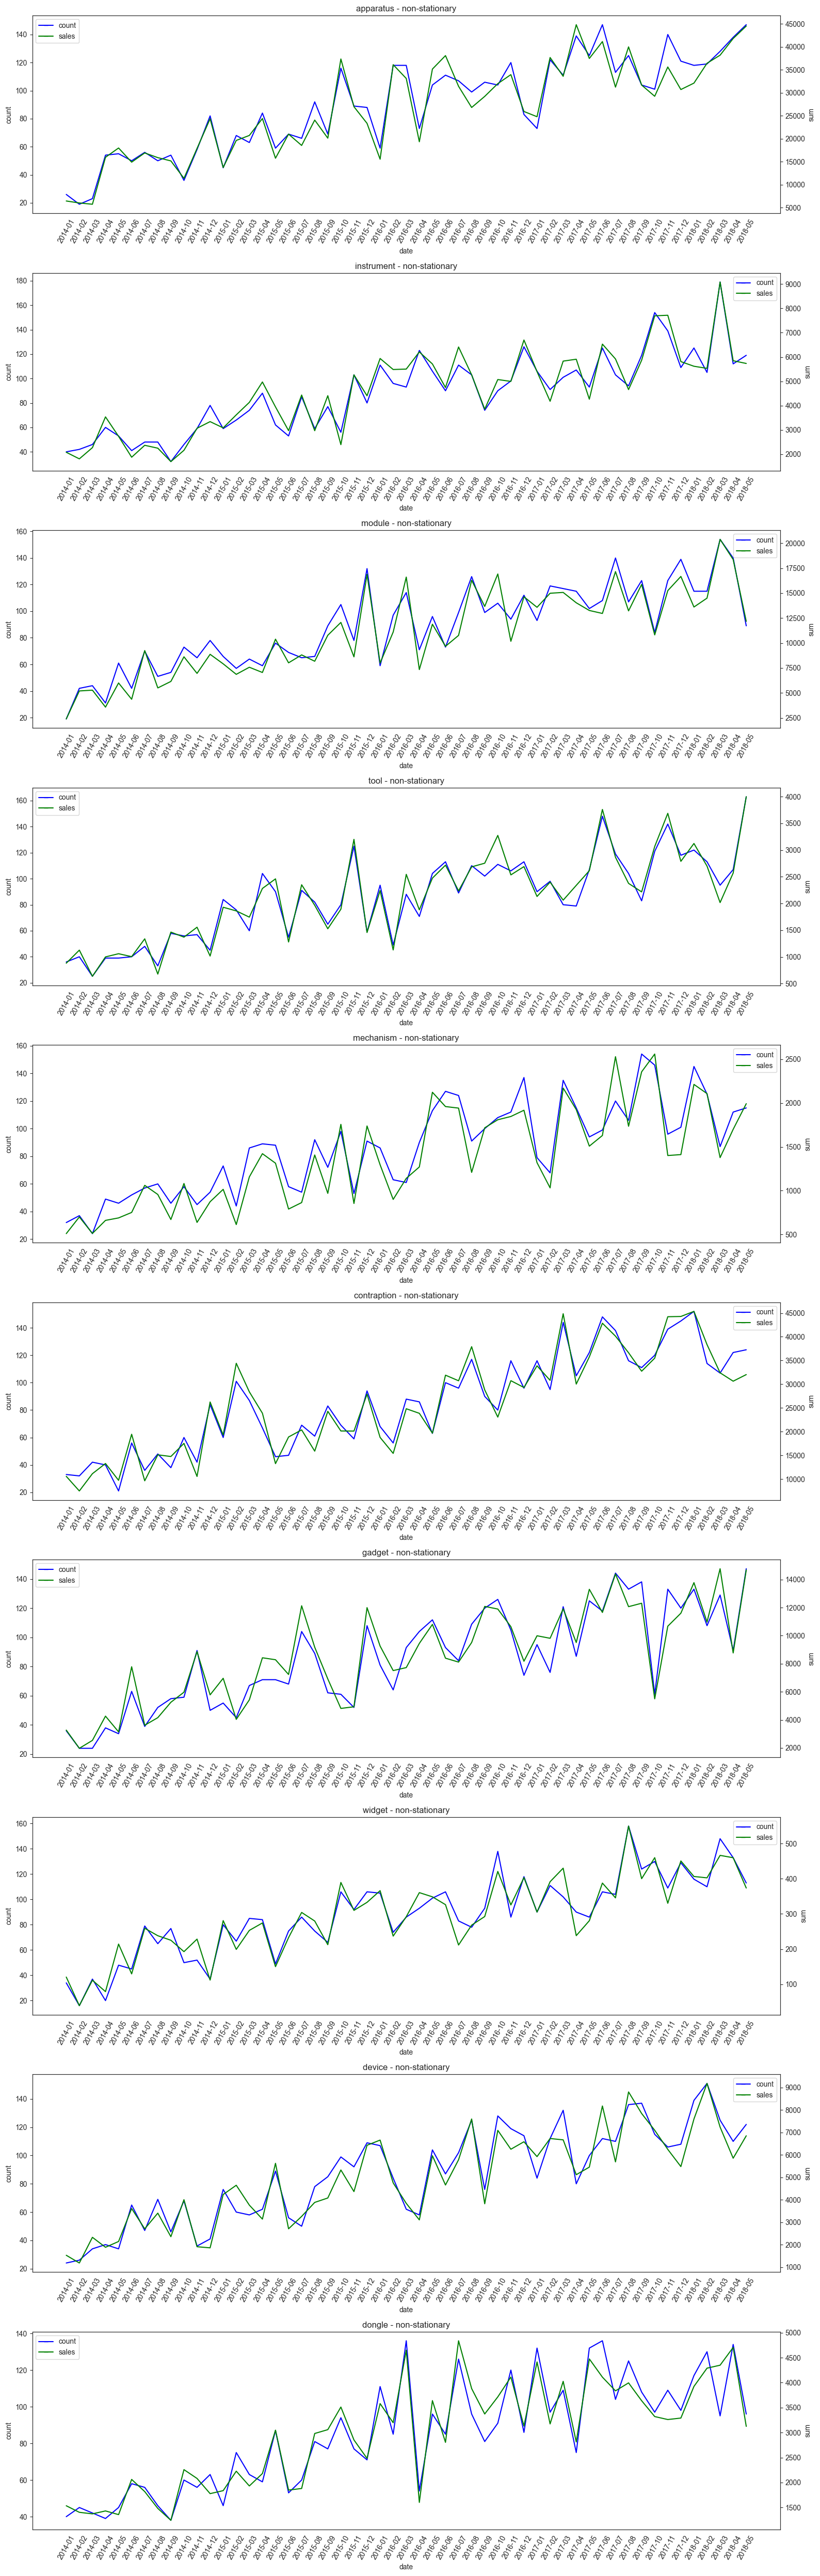

In [291]:
plot(dictio, categories, width=50)

From the figure above, we can observe that:
- All of the time series data are non-stationary, meaning that there is somekind of trend and seasonality in the data
- It seems that quantity and sales are closely correlated
- Almost all of the time series data have a increase spike in month 11 and 12 in each years  

## 5. Model Definition

### ARIMA

We will use ARIMA for the time series prediction

## 6. Model Training

### • Count

In [338]:
# create a dictionary to be input by all of the ARIMA models
dictio_model_count = {}
for cat in categories:
    dictio_model_count[cat] = auto_arima(dictio[cat]['count'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=12, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)
    
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=394.025, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=379.639, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=380.172, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=387.710, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=379.452, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=380.793, Time=0.05 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.98 sec
 AR

### • Sales

In [339]:
dictio_model_sales = {}
for cat in categories:
    dictio_model_sales[cat] = auto_arima(dictio[cat]['sum'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=12, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)
    
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=859.294, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=843.174, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=851.201, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=840.432, Time=0.12 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=841.946, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=841.992, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=840.628, Time=0.09 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=843.940, Time=0.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=843.727, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=837.143, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=838.513, Time=0.06 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=838.688, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=838.725, Time=0.25 sec
 ARIMA(2,1,0)(1,1,1)[12]             

## 7. Prediction

In [342]:
# Create date for the predicted month
index_new = pd.date_range('2018-06', periods=7, freq='M').to_period('M')
index_new

PeriodIndex(['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
             '2018-12'],
            dtype='period[M]')

In [376]:
# create a dictionary to contain the prediction and the data
dictio_result = {}
for cat in categories:
    prediction = pd.DataFrame(index_new, columns=['date'])
    prediction['count'] = np.round(dictio_model_count[cat].predict(n_periods=7).reset_index(drop=True))
    prediction['sum'] = dictio_model_sales[cat].predict(n_periods=7).reset_index(drop=True)
    
    dictio_result[cat] = pd.concat([dictio[cat], prediction], ignore_index=True)
    
    

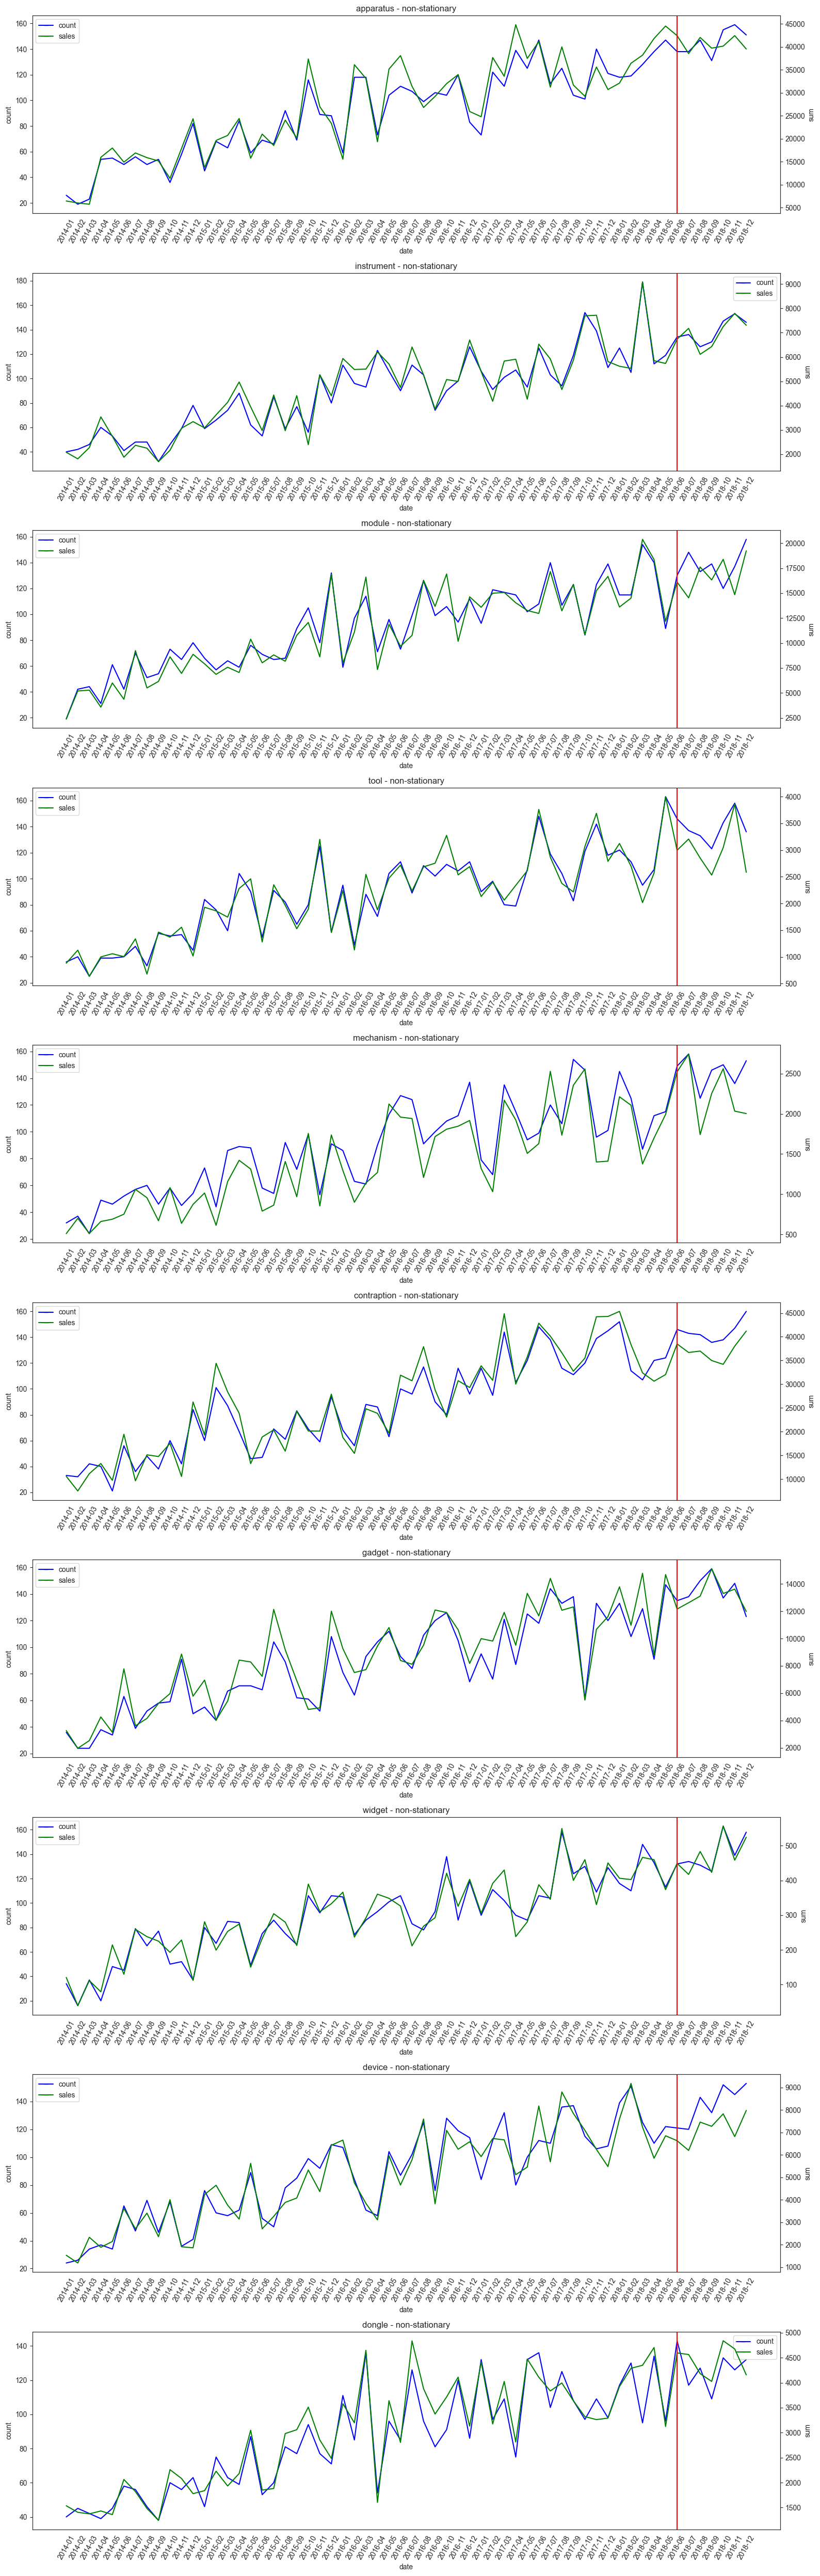

In [394]:
plot(dictio_result, categories, vert_line=53, width=50)

Based on the figure above, we can see that:
- apparatus, contraption and widget will have an increase for the next 6 months
- tools, mechanism and dongle will have a decrease for the next 6 months